In [1]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topics = 4

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(doc_ls) #DTM (사이킷런도 DTM)
svd = TruncatedSVD(n_components=n_topics, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [3]:
len(doc_ls)

12

In [4]:
U.shape #좌특이벡터

(12, 4)

In [5]:
Vt.shape #우특이벡터

(4, 16)

In [6]:
tfidf.shape #DTM에서 TFIDF 구한 값

(12, 16)

In [7]:
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))

16


In [8]:
Vt #행은 주제, 단어 연관도

array([[ 0.03615365,  0.10978603,  0.01834125,  0.09862335,  0.01834125,
         0.05470036,  0.3297113 ,  0.04131708,  0.02775026,  0.3297113 ,
         0.03615365,  0.21640648,  0.4991573 ,  0.29964085,  0.1641898 ,
         0.58250527],
       [ 0.06740048,  0.15347979,  0.03284554,  0.12078756,  0.03284554,
         0.09988705, -0.28961955,  0.07490311,  0.04867686, -0.28961955,
         0.06740048,  0.31494725,  0.43992407,  0.39142644,  0.23904844,
        -0.51167464],
       [ 0.25326653, -0.21577691, -0.07776122, -0.09834554, -0.07776122,
         0.35279702,  0.01226021, -0.12482955, -0.10832038,  0.01226021,
         0.25326653,  0.70278052, -0.07237264, -0.29248516, -0.25719626,
         0.02166027],
       [ 0.02997407,  0.68200798,  0.27162684,  0.25478532,  0.27162684,
         0.04111418,  0.00405599, -0.14359192,  0.37257919,  0.00405599,
         0.02997407,  0.0752597 , -0.02641656, -0.27990967, -0.2732592 ,
         0.00716578]])

In [59]:
#argsort : 오름차순 정렬 및 인덱스 부여 
#round : 반올림
n = 4
for i, topic in enumerate(Vt): #i, topic 순서로 구현해야 함. 순서를 반대로 하면 에러발생.
    print("Topic {} :".format(i), [(vocab[i], topic[i].round(3)) for i in topic.argsort()[:-n-1:-1]])

Topic 0 : [('포도', 0.583), ('짜장면', 0.499), ('사과', 0.33), ('바나나', 0.33)]
Topic 1 : [('짜장면', 0.44), ('짬뽕', 0.391), ('스시', 0.315), ('탕수육', 0.239)]
Topic 2 : [('스시', 0.703), ('라면', 0.353), ('가츠동', 0.253), ('소바', 0.253)]
Topic 3 : [('김치', 0.682), ('비빔밥', 0.373), ('된장찌개', 0.272), ('김치찌개', 0.272)]


In [66]:
n = 3
temp = [0, 1, 2, 3, 4, 5]
temp[:-n-1:-1]

[5, 4, 3]

In [11]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    return dot(a, b)/(norm(a)*norm(b))

def calc_similarity_matrix(vectors):
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(3)
            
    return similarity_matrix
    

In [12]:
vectors = Vt.T
word_similarity_matrix = calc_similarity_matrix(vectors)
word_similarity_matrix.shape

(16, 16)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="malgun Gothic") #window
#plt.rc("font", family="AppleGothic") #mac

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label, 
                     annot=True, fmt=".2f", annot_kws={"size":8}, cmap="coolwarm")

C:\Users\user\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


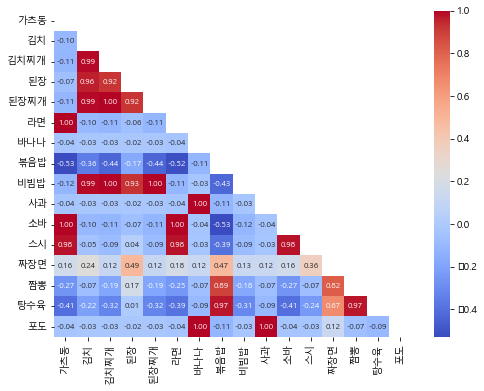

In [14]:
visualize_similarity(word_similarity_matrix, vocab)

C:\Users\user\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


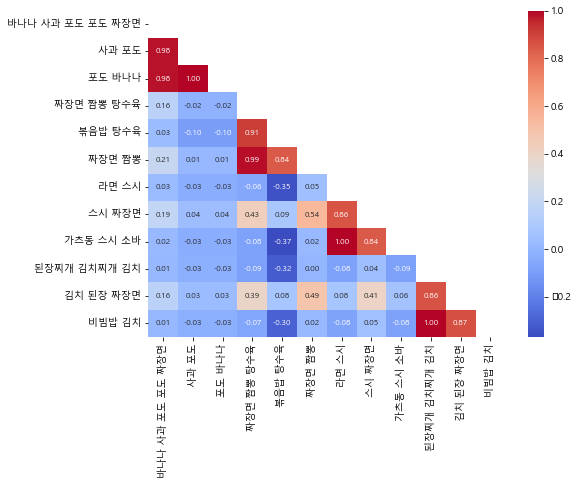

In [15]:
doc_similarity_matrix = calc_similarity_matrix(U)
visualize_similarity(doc_similarity_matrix, doc_ls)

In [18]:
from sklearn.manifold import TSNE

def visialize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    T = tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1,y+1), xytext=(0, 0), textcoords='offset points')

C:\Users\user\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


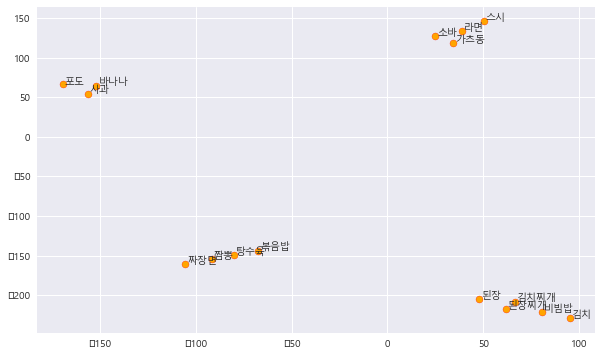

In [67]:
plt.style.use('seaborn')
plt.rc("font", family="malgun Gothic")
visialize_vectors(vectors, vocab)

In [22]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=6787439faa8641d3a5ca0a26145ea64f7230f6c183bed4e2b121c6b4c9832f8e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c9\21\f6\17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=97d0a136a59ba63a9bae9adfac7483d20a7a4433e51645460a6509e31fee811c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel

In [27]:
import nltk 
nltk.download("stopwords")
from nltk.corpus import stopwords

import pandas as pd
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups(shuffle=True, random_state=42, remove=("headers", "footer", "quotes"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
dataset['data'][:5]

[' I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please

In [44]:
def get_news(news_dataset, apply_split=True):
    documents = news_dataset.data
    news_df = pd.DataFrame({"document": documents})
    news_df["clean_doc"] = news_df["document"].str.replace("[^a-zA-Z]", " ") #정규식: 영어가 아닌 것은 모두 빈칸으로 대체
    news_df["clean_doc"] = news_df["clean_doc"].apply(lambda x : " ".join([w.lower() for w in x.split() if len(w) > 2]))
    tokenized_doc = news_df["clean_doc"].apply(lambda x : x.split())
    
    stop_words = stopwords.words('english')
    
    if apply_split:
        return tokenized_doc.apply(lambda x : [item for item in x if item not in stop_words]) #불용어에 item이 없다면, x안에 item 반복
    else:
        return tokenized_doc.apply(lambda x : " ".join([item for item in x if item not in stop_words]))
    

In [45]:
tokenized_docs = get_news(dataset, False) 

C:\Users\user\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = LatentDirichletAllocation(n_components=5, max_iter=50, learning_method="online", random_state=42)
lda_output = lda.fit_transform(tfidf)

In [71]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds="tsne")
pyLDAvis.display(vis)

C:\Users\user\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\user\anaconda3\envs\nlp\lib\site-packages\s